In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('q_quora.csv',usecols=['id','qid1','qid2','question1','question2','is_duplicate']).sample(1000)
df

,id,qid1,qid2,question1,question2,is_duplicate
174078,174078,343926,343927,How do I make effective presentation?,How can I give a wonderful presentation?,1
352876,352876,691202,691203,How many questions can I ask anonymously on Qu...,Is there a question limit on Quora?,0
337516,337516,661687,661688,Why are people so rude to me?,Why are people generally rude?,1
120093,120093,237999,238000,What happens after you die? (Human Being),What happens if we die?,1
115496,115496,228951,228952,How did the Israeli-Palestinian conflict start?,How can the Israeli-Palestinian conflict end?,0
...,...,...,...,...,...,...
25035,25035,49935,49936,What is Linux? What is its use?,What is the use of Linux?,1
216488,216488,426869,426870,What is the best champion in league of legends?,Which is the best top lane champion in league ...,1
125264,125264,248184,248185,Why can’t we paint with watercolors on canvas?,Is it possible to paint with watercolor on can...,0
324008,324008,635578,635579,How can I start practice Hadoop?,How do I practice for learning Hadoop?,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 174078 to 75276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1000 non-null   int64 
 1   qid1          1000 non-null   int64 
 2   qid2          1000 non-null   int64 
 3   question1     1000 non-null   object
 4   question2     1000 non-null   object
 5   is_duplicate  1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 54.7+ KB


In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
df.duplicated().sum()

0

0    623
1    377
Name: is_duplicate, dtype: int64


<AxesSubplot:>

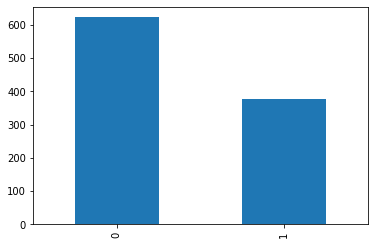

In [6]:
print(df['is_duplicate'].value_counts())
df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
# finding the common word length in a row
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [8]:
df['common']=df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common
174078,174078,343926,343927,How do I make effective presentation?,How can I give a wonderful presentation?,1,3
352876,352876,691202,691203,How many questions can I ask anonymously on Qu...,Is there a question limit on Quora?,0,2
337516,337516,661687,661688,Why are people so rude to me?,Why are people generally rude?,1,3
120093,120093,237999,238000,What happens after you die? (Human Being),What happens if we die?,1,3
115496,115496,228951,228952,How did the Israeli-Palestinian conflict start?,How can the Israeli-Palestinian conflict end?,0,4


In [9]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [10]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common,word_total
174078,174078,343926,343927,How do I make effective presentation?,How can I give a wonderful presentation?,1,3,13
352876,352876,691202,691203,How many questions can I ask anonymously on Qu...,Is there a question limit on Quora?,0,2,16
337516,337516,661687,661688,Why are people so rude to me?,Why are people generally rude?,1,3,12
120093,120093,237999,238000,What happens after you die? (Human Being),What happens if we die?,1,3,12
115496,115496,228951,228952,How did the Israeli-Palestinian conflict start?,How can the Israeli-Palestinian conflict end?,0,4,12


In [11]:
df['word_share'] = round(df['common']/df['word_total'],3)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,common,word_total,word_share
174078,174078,343926,343927,How do I make effective presentation?,How can I give a wonderful presentation?,1,3,13,0.231
352876,352876,691202,691203,How many questions can I ask anonymously on Qu...,Is there a question limit on Quora?,0,2,16,0.125
337516,337516,661687,661688,Why are people so rude to me?,Why are people generally rude?,1,3,12,0.250
120093,120093,237999,238000,What happens after you die? (Human Being),What happens if we die?,1,3,12,0.250
115496,115496,228951,228952,How did the Israeli-Palestinian conflict start?,How can the Israeli-Palestinian conflict end?,0,4,12,0.333


In [14]:
ques=df[['question1','question2']]
ques

,question1,question2
174078,How do I make effective presentation?,How can I give a wonderful presentation?
352876,How many questions can I ask anonymously on Qu...,Is there a question limit on Quora?
337516,Why are people so rude to me?,Why are people generally rude?
120093,What happens after you die? (Human Being),What happens if we die?
115496,How did the Israeli-Palestinian conflict start?,How can the Israeli-Palestinian conflict end?
...,...,...
25035,What is Linux? What is its use?,What is the use of Linux?
216488,What is the best champion in league of legends?,Which is the best top lane champion in league ...
125264,Why can’t we paint with watercolors on canvas?,Is it possible to paint with watercolor on can...
324008,How can I start practice Hadoop?,How do I practice for learning Hadoop?


In [16]:
df_new=df.drop(columns=['id','qid1','qid2','question1','question2'])
df_new

,is_duplicate,common,word_total,word_share
174078,1,3,13,0.231
352876,0,2,16,0.125
337516,1,3,12,0.250
120093,1,3,12,0.250
115496,0,4,12,0.333
...,...,...,...,...
25035,1,3,11,0.273
216488,1,8,20,0.400
125264,0,4,17,0.235
324008,0,4,13,0.308


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques['question1']) + list(ques['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [23]:
temp_df1 = pd.DataFrame(q1_arr, index= ques.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(1000, 6000)

In [33]:
final_df = pd.concat([df_new,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(1000, 6004)


,is_duplicate,common,word_total,word_share,0,1,2,3,4,5,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
174078,1,3,13,0.231,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
352876,0,2,16,0.125,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337516,1,3,12,0.250,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120093,1,3,12,0.250,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115496,0,4,12,0.333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.68

In [37]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 9.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
y_int = y_train.astype(int)
y_int[:5]

array([1, 1, 1, 0, 0])

In [52]:
y_tes=y_test.astype(int)
y_tes[:5]

array([1, 1, 1, 1, 0])

In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_int)
y_pred = xgb.predict(X_test)
accuracy_score(y_tes,y_pred)

0.655